# LinearRegression и LogisticRegression

Реализовать 2 класса LinearRegression и LogisticRegression

In [1]:
class LinearRegression():
    def __init__(self):
        self.W = 
    def linear_activation(x):
        return (x > 0)*1
    def fit(self):
        pass
    def predict(self):
        pass
    def fit_predict(self):
        pass

In [2]:
class LogisticRegression():
    def __init__(self):
        pass
    def sigmoid_activation(x):
        return 1.0 / (1 + np.exp(-x))
    def fit(self):
        pass
    def predict(self):
        pass
    def fit_predict(self):
        pass

In [1]:
import time
import pandas as pd
import numpy as np

df = pd.read_csv('./data/cs-training.csv', sep=',')
df = df.dropna()
X = df.as_matrix(columns=df.columns[1:])
y = df.as_matrix(columns=df.columns[:1])
y = y.reshape(y.shape[0])
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
x = np.copy(X)
# x.T[:1] = 1
t1 = time.time()
beta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(time.time() - t1)
print(beta)

0.019939422607421875
[  1.00000000e+00   2.05140792e-22   1.92551765e-18  -1.29020059e-17
   7.21301494e-21  -2.53737653e-22   3.07091795e-18   9.81202966e-17
   1.06522863e-17  -9.35666475e-17  -9.10052199e-18]


(24054, 11)
0.617198804996
5.500sec
----------------------------------
(24054, 11)
0.615991568734
4.281sec
----------------------------------
(24054, 11)
0.629930040713
4.574sec
----------------------------------
(24054, 11)
0.630076237775
4.597sec
----------------------------------
(24053, 11)
0.617150060588
4.527sec
----------------------------------
(24053, 11)


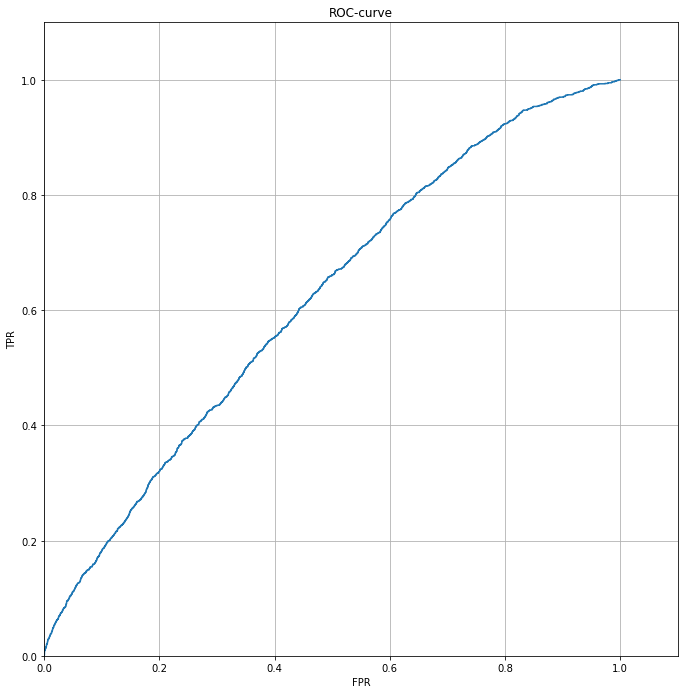

In [53]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.datasets.samples_generator import make_blobs

params = {'figure.subplot.left': 0.07,
          'figure.figsize': (10, 10),
          'figure.subplot.right': 0.95,
          'figure.subplot.bottom': 0.07,
          'figure.subplot.top': 0.95}
plt.rcParams.update(params)


class LinearRegression():
    def __init__(self):
        self.W = np.random.uniform(size=(1, ))
        self.fitted = False

    def linear_activation(self, x):
        return (x > 0) * 1

    def fit(self, X, y, epochs=10000):
        if not self.fitted:
            # self.W = np.random.uniform(size=(X.shape[1],))
            self.W = np.ones((X.shape[1], ))
            self.fitted = True
        epoch = 0
        alpha = 0.1
        while epoch < epochs:
            epoch += 1
            # alpha /= epoch
            # preds = self.linear_activation(np.dot(X, self.W))
            preds = np.dot(X, self.W)
            error = preds - y
            gradient = X.T.dot(error) / X.shape[0]
            # oldW = np.copy(self.W)
            self.W += - alpha * gradient
            # eps = np.linalg.norm(self.W - oldW)
            # if eps < 0.001:
            #     break
            # print(eps)
        # print(self.W)

    def predict(self, X):
        return (self.linear_activation(np.dot(X, self.W)) > 0) * 1

    def fit_predict(self):
        pass


class LogisticRegression():
    def __init__(self):
        self.W = np.random.uniform(size=(1, ))
        self.fitted = False

    def sigmoid_activation(self, x):
        return 1.0 / (1 + np.exp(-x))

    def fit(self, X, y, epochs=1000):
        Xn = (X - X.min()) / X.ptp(0)
        self.X1 = np.c_[np.ones((Xn.shape[0])), Xn]
        if not self.fitted:
            self.W = np.random.uniform(size=(self.X1.shape[1], ))
            self.fitted = True
        epoch = 0
        alpha = 0.01
        while epoch < epochs:
            epoch += 1
            preds = self.sigmoid_activation(self.X1.dot(self.W))
            error = preds - y
            loss = np.sum(error) / self.X1.shape[0]
            # print(loss)
            gradient = self.X1.T.dot(error) / self.X1.shape[0]
            self.W += - alpha * gradient
            # alpha = np.linalg.norm(gradient) / np.linalg.norm(preds)
        # print(self.W)

    def predict(self, X):
        Xn = (X - X.min()) / X.ptp(0)
        X1 = np.ones((Xn.shape[0], Xn.shape[1] + 1))
        X1.T[1:] = Xn.T
#         X1 = np.c_[np.ones((Xn.shape[0])), Xn]
        print(X1.shape)
        return self.sigmoid_activation(X1.dot(self.W))

    def fit_predict(self):
        pass


df = pd.read_csv('./data/cs-training.csv', sep=',')
df = df.dropna()
X = df.as_matrix(columns=df.columns[1:])
y = df.as_matrix(columns=df.columns[:1])
y = y.reshape(y.shape[0])

# (X, y) = make_blobs(n_samples=25000, n_features=10, centers=2, cluster_std=1.5, random_state=20)

gkf = KFold(n_splits=5, shuffle=True)

# lin = LinearRegression()
log = LogisticRegression()

for train, test in gkf.split(X, y):
    t1 = time.time()
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]

    log.fit(X_train, y_train)
    print(roc_auc_score(y_score=log.predict(X_test), y_true=y_test))
    print("%.3fsec" % (time.time() - t1))
    print("----------------------------------")

y_score=log.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_score=y_score, y_true=y_test)

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.grid(True)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')
plt.show()

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta


def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
print(x)
print(y)
m, n = np.shape(x)
numIterations= 100
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

[[  1.   0.]
 [  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]
 [  1.  11.]
 [  1.  12.]
 [  1.  13.]
 [  1.  14.]
 [  1.  15.]
 [  1.  16.]
 [  1.  17.]
 [  1.  18.]
 [  1.  19.]
 [  1.  20.]
 [  1.  21.]
 [  1.  22.]
 [  1.  23.]
 [  1.  24.]
 [  1.  25.]
 [  1.  26.]
 [  1.  27.]
 [  1.  28.]
 [  1.  29.]
 [  1.  30.]
 [  1.  31.]
 [  1.  32.]
 [  1.  33.]
 [  1.  34.]
 [  1.  35.]
 [  1.  36.]
 [  1.  37.]
 [  1.  38.]
 [  1.  39.]
 [  1.  40.]
 [  1.  41.]
 [  1.  42.]
 [  1.  43.]
 [  1.  44.]
 [  1.  45.]
 [  1.  46.]
 [  1.  47.]
 [  1.  48.]
 [  1.  49.]
 [  1.  50.]
 [  1.  51.]
 [  1.  52.]
 [  1.  53.]
 [  1.  54.]
 [  1.  55.]
 [  1.  56.]
 [  1.  57.]
 [  1.  58.]
 [  1.  59.]
 [  1.  60.]
 [  1.  61.]
 [  1.  62.]
 [  1.  63.]
 [  1.  64.]
 [  1.  65.]
 [  1.  66.]
 [  1.  67.]
 [  1.  68.]
 [  1.  69.]
 [  1.  70.]
 [  1.  71.]
 [  1.  72.]
 [  1.  73.]
 [  1.  74.]
 [  1.  75.]
 [  1.  76.]

In [40]:
log.predict(X[0])

IndexError: tuple index out of range

In [98]:
from sklearn.metrics import roc_auc_score

def linear_activation(x):
    return (x > 0)*1

def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

W = np.array([ 0.60037721,  0.57890594, -0.40114193])

print(sigmoid_activation(np.dot(X[3], W)))
print(y)

print(np.dot(X[3], W))

0.816791200515
[1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0]
1.49475701046


In [144]:
Xn = (X - X.min()) / X.ptp(0)
X1 = np.c_[np.ones((Xn.shape[0])), Xn]
W = np.array([-1.598197,    0.08926611, -0.723938,    0.68892601,  0.55897006,  0.38774741,
  0.41486352,  0.91474139, -0.00213997,  0.76551091,  0.24011971])
print(y[34], X1[13].dot(W))

0 -1.97251333288


In [16]:
X1 = np.c_[np.ones((X.shape[0])), X]
X1.shape

(120269, 11)

In [45]:
X[0].reshape((1, 10))
X[0].shape

(10,)

In [38]:
x = np.array([[ 0,  1,  2],
            [ 3,  4,  5],
            [ 6,  7,  8],
            [ 9, 10, 11]])
x = np.array([[ 0,  1,  2]])
b = np.ones((x.shape[0],x.shape[1] + 1))
b.T[1:] = x.T
print(x)
print(b)

[[0 1 2]]
[[ 1.  0.  1.  2.]]
